# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [102]:

df_descr = pd.read_csv('otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [103]:
df_train = pd.read_csv('otp_train.csv', sep='\t', encoding='utf8')

In [104]:
df_train.shape

(15223, 52)

In [105]:
df_test = pd.read_csv('otp_test.csv', sep='\t', encoding='utf8')

In [106]:
df_test.shape

(14910, 52)

In [107]:
df_train.head(50)

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN
5,59911784,0,29,1,0,0,0,0,Среднее,Гражданский брак,...,0,1,2,1,11,0,0,0,0,NaN
6,59911832,0,35,1,0,0,1,1,Высшее,Разведен(а),...,0,1,2,2,14,0,0,0,0,NaN
7,59912034,0,41,1,0,1,0,0,Среднее,Состою в браке,...,1,1,2,1,11,0,0,0,0,NaN
8,59912560,0,53,1,0,0,2,0,Высшее,Состою в браке,...,0,1,1,1,3,0,0,0,0,NaN
9,59912659,0,43,1,0,1,0,0,Среднее специальное,Состою в браке,...,0,1,1,1,6,0,0,0,0,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [108]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [109]:
df = df_test.append(df_train).reset_index(drop=True)

In [110]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [112]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неоконченное высшее', 'Высшее', 'Среднее', 'Неполное среднее', 'Среднее специальное', 'Ученая степень', 'Два и более высших образования'}


MARITAL_STATUS
{'Состою в браке', 'Разведен(а)', 'Вдовец/Вдова', 'Гражданский брак', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Управляющая компания', 'Транспорт', 'Торговля', 'Банк/Финансы', 'Развлечения/Искусство', 'Недвижимость', 'Коммунальное хоз-во/Дорожные службы', 'Здравоохранение', 'Страхование', 'Другие сферы', 'Информационные технологии', 'Логистика', 'Энергетика', 'Юридические услуги/нотариальные услуги', 'Образование', 'Подбор персонала', 'Государственная служба', 'ЧОП/Детективная д-ть', 'Металлургия/Промышленность/Машиностроение', 'Туризм', 'Сельское хозяйство', 'Нефтегазовая промышленность', 'Наука', 'Ресторанный бизнес/Общественное питание', 'Химия/Парфюмерия/Фармацевтика', 'СМИ/Реклама/PR-агенства', 'Строительство', 'Салоны красоты и здоровья', 'Сборочные производства', 'Маркетинг', 'Информационные услуги'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [113]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [114]:
df.head()
df.isnull().sum()

# Поропуски есть. Есть также несколько вариантов решения этой проблемы:
# 1) Удалить столбцы вообще. Можно предположить, что они не сильно будут влиять на результаты. 
# GEN_INDUSTRY                   2713
# GEN_TITLE                      2713
# ORG_TP_STATE                   2713
# ORG_TP_FCAPITAL                2708
# JOB_DIR                        2713
# TP_PROVINCE                     590
# WORK_TIME                      2717
# PREVIOUS_CARD_NUM_UTILIZED    29533

# Лишь в одном столбце данных пропущено крайне много, всего заполнено 600 значений из 30133. 
# Что бы было больше аргументов в пользу удаления столбцов из датасета, необходимо посмотреть кол-во уникальных значений 
# в столбцах. Предположим, если они в большенстве случаев уникальны, то их лучше удалить.


AGREEMENT_RK                      0
TARGET                            0
AGE                               0
SOCSTATUS_WORK_FL                 0
SOCSTATUS_PENS_FL                 0
GENDER                            0
CHILD_TOTAL                       0
DEPENDANTS                        0
EDUCATION                         0
MARITAL_STATUS                    0
GEN_INDUSTRY                   2713
GEN_TITLE                      2713
ORG_TP_STATE                   2713
ORG_TP_FCAPITAL                2708
JOB_DIR                        2713
FAMILY_INCOME                     0
PERSONAL_INCOME                   0
REG_ADDRESS_PROVINCE              0
FACT_ADDRESS_PROVINCE             0
POSTAL_ADDRESS_PROVINCE           0
TP_PROVINCE                     590
REGION_NM                         2
REG_FACT_FL                       0
FACT_POST_FL                      0
REG_POST_FL                       0
REG_FACT_POST_FL                  0
REG_FACT_POST_TP_FL               0
FL_PRESENCE_FL              

In [115]:
df.nunique(axis=0)
# GEN_INDUSTRY                   2713       31      
# GEN_TITLE                      2713       12     
# ORG_TP_STATE                   2713       5       
# ORG_TP_FCAPITAL                2708       2        
# JOB_DIR                        2713       10             
# TP_PROVINCE                     590       70        
# WORK_TIME                      2717       372        
# PREVIOUS_CARD_NUM_UTILIZED    29533       2

# В целом нельзя сказать, что данные уникальны, есть большое кол-во повторов.
# Можно удалить как столбцы. Можно удалить отдельные строки, что сократит выборку и, возможно, будет показывать
# неудовлетворительный резулььат на данных где будут пропуски. 

# Поэтому лучше всего заполнить пропуски числовыми значениями равными 0 (но после one-hot-encoding)
# В PREVIOUS_CARD_NUM_UTILIZED пустые значения нужно заполнить 0. 
# WORK_TIME записать медианное или среднее значение по выборке.


AGREEMENT_RK                  30133
TARGET                            2
AGE                              47
SOCSTATUS_WORK_FL                 2
SOCSTATUS_PENS_FL                 2
GENDER                            2
CHILD_TOTAL                      10
DEPENDANTS                        8
EDUCATION                         7
MARITAL_STATUS                    5
GEN_INDUSTRY                     31
GEN_TITLE                        12
ORG_TP_STATE                      5
ORG_TP_FCAPITAL                   2
JOB_DIR                          10
FAMILY_INCOME                     5
PERSONAL_INCOME                 373
REG_ADDRESS_PROVINCE             82
FACT_ADDRESS_PROVINCE            83
POSTAL_ADDRESS_PROVINCE          82
TP_PROVINCE                      70
REGION_NM                        11
REG_FACT_FL                       2
FACT_POST_FL                      2
REG_POST_FL                       2
REG_FACT_POST_FL                  2
REG_FACT_POST_TP_FL               2
FL_PRESENCE_FL              

In [116]:
df['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
30103    1.0
30104    0.0
30105    0.0
30106    0.0
30107    0.0
30108    0.0
30109    1.0
30110    0.0
30111    0.0
30112    0.0
30113    0.0
30114    0.0
30115    0.0
30116    0.0
30117    0.0
30118    0.0
30119    0.0
30120    0.0
30121    0.0
30122    0.0
30123    0.0
30124    0.0
30125    0.0
30126    0.0
30127    0.0
30128    0.0
30129    0.0
30130    0.0
30131    0.0
30132    0.0
Name: PREVIOUS_CARD_NUM_UTILIZED, Length: 30133, dtype: float64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [19]:
# Есть
#Выведем все категорильные признаки
df_2 = df[['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 
           'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME',
           'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE',
           'TP_PROVINCE', 'REGION_NM']]
df_2.nunique(axis=0)
df_2.info()
# по хорошему удалить почти все. Но в целом с категориальными признакми необходимо провести операцию "one-hot-encoding".
# FAMILY_INCOME можно разбить на 2х столбца где минимальная граница диапозона будет MIN-INCOME и максимальная MAX-INCOME.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 13 columns):
EDUCATION                  30133 non-null object
MARITAL_STATUS             30133 non-null object
GEN_INDUSTRY               27420 non-null object
GEN_TITLE                  27420 non-null object
ORG_TP_STATE               27420 non-null object
ORG_TP_FCAPITAL            27425 non-null object
JOB_DIR                    27420 non-null object
FAMILY_INCOME              30133 non-null object
REG_ADDRESS_PROVINCE       30133 non-null object
FACT_ADDRESS_PROVINCE      30133 non-null object
POSTAL_ADDRESS_PROVINCE    30133 non-null object
TP_PROVINCE                29543 non-null object
REGION_NM                  30131 non-null object
dtypes: object(13)
memory usage: 3.0+ MB


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!



In [20]:
def preproc_data(df):
    #list(df)
    df_output = df.copy()
    try:
        df_output = df_output.drop('AGREEMENT_RK', axis=1) #Удаляем идентификатор AGREEMENT_RK
    except KeyError:
        ''
    
    for i in df_output.columns: #проходим по названию колонок
            if i == 'PERSONAL_INCOME' or i == 'CREDIT' or i == 'FST_PAYMENT' or i == 'LOAN_AVG_DLQ_AMT' or i == 'LOAN_MAX_DLQ_AMT': #находим все столбцы
                df_output[i] = df_output[i].map(lambda x: x.replace(',', '.')).astype('float') #заменяем ',', на '.'

    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0) #Заменяем NaN числовым значением 0

    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE',
                                    'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME',
                                    'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE',
                                    'TP_PROVINCE', 'REGION_NM']) #делем OHN
     


    for j in df_output.columns: # Заполняем пропуски медианным значением
        if j == 'WORK_TIME':
            df_output[j] = df_output[j].fillna(df_output[j].median())

    return df_output

In [21]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 13 columns):
EDUCATION                  30133 non-null object
MARITAL_STATUS             30133 non-null object
GEN_INDUSTRY               27420 non-null object
GEN_TITLE                  27420 non-null object
ORG_TP_STATE               27420 non-null object
ORG_TP_FCAPITAL            27425 non-null object
JOB_DIR                    27420 non-null object
FAMILY_INCOME              30133 non-null object
REG_ADDRESS_PROVINCE       30133 non-null object
FACT_ADDRESS_PROVINCE      30133 non-null object
POSTAL_ADDRESS_PROVINCE    30133 non-null object
TP_PROVINCE                29543 non-null object
REGION_NM                  30131 non-null object
dtypes: object(13)
memory usage: 3.0+ MB


In [117]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

In [23]:
df_train_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 14910 to 30132
Columns: 443 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(31), uint8(405)
memory usage: 10.4 MB


In [118]:
df_test_preproc.info()
df_train_preproc['EDUCATION_Среднее'].unique

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14910 entries, 0 to 14909
Columns: 443 entries, TARGET to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(31), uint8(405)
memory usage: 10.2 MB


<bound method Series.unique of 14910    0
14911    1
14912    0
14913    0
14914    1
14915    1
14916    0
14917    1
14918    0
14919    0
14920    0
14921    0
14922    1
14923    0
14924    0
14925    0
14926    0
14927    0
14928    1
14929    0
14930    0
14931    0
14932    0
14933    0
14934    0
14935    0
14936    0
14937    0
14938    0
14939    0
        ..
30103    0
30104    1
30105    1
30106    1
30107    0
30108    0
30109    1
30110    1
30111    0
30112    0
30113    0
30114    1
30115    0
30116    1
30117    1
30118    0
30119    0
30120    0
30121    0
30122    1
30123    1
30124    0
30125    0
30126    1
30127    0
30128    1
30129    0
30130    1
30131    1
30132    1
Name: EDUCATION_Среднее, Length: 15223, dtype: uint8>

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [149]:
from sklearn.linear_model import LogisticRegression

X_df_train_preproc = df_train_preproc.drop('TARGET', axis=1)
X_df_test_preproc = df_test_preproc.drop('TARGET', axis=1)

y_df_train_preproc = df_train_preproc['TARGET']
y_df_test_preproc = df_test_preproc['TARGET']

model_1 = LogisticRegression()                      # инициализируем модель
model_1.fit(X_df_train_preproc, y_df_train_preproc) # обучаем модель
predict = model_1.predict(X_df_test_preproc)        # делаем предсказание

In [26]:
list(zip(y_df_test_preproc, predict)) # сравним глазами

[(0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 0),
 

In [120]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

precision_score(y_df_test_preproc, predict)


0.3181818181818182

In [150]:

from sklearn.metrics import accuracy_score, f1_score

print('precision', precision_score(y_df_test_preproc, predict))
print('recall', recall_score(y_df_test_preproc, predict))
print('accuracy', accuracy_score(y_df_test_preproc, predict))
print('f1', f1_score(y_df_test_preproc, predict))

precision 0.3181818181818182
recall 0.004
accuracy 0.8820925553319919
f1 0.007900677200902935


#### Задание 5. Обучение и оценка качества разных моделей

In [151]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here

#X_df_train_preproc, X_df_test_preproc, y_df_train_preproc, y_df_test_preproc = train_test_split(df_train_preproc, y_df_test_preproc, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_df_train_preproc, y_df_train_preproc, test_size=0.33, random_state=42)

In [153]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


model_2 = LogisticRegression()                   # инициализируем модель
model_2.fit(X_train, y_train)                       # обучаем модель
predict_2 = model_2.predict(X_test)                   # делаем предсказание
predict_proba_2 = model_2.predict_proba(X_test) # делаем вероятностное предсказание


print('precision', precision_score(y_test, predict_2))
print('recall', recall_score(y_test, predict_2))
print('accuracy', accuracy_score(y_test, predict_2))
print('f1', f1_score(y_test, predict_2))
## Your Code Here

precision 0.4
recall 0.003278688524590164
accuracy 0.8783837579617835
f1 0.006504065040650406


In [154]:
predict_proba_2[:,1]

array([0.26518112, 0.05718294, 0.20559745, ..., 0.04421123, 0.05904336,
       0.1375478 ])

In [155]:
model_3 = RandomForestClassifier()
model_3.fit(X_train, y_train)                       # обучаем модель
predict_3 = model_3.predict(X_test)                   # делаем предсказание
predict_proba_3 = model_3.predict_proba(X_test)

print('precision', precision_score(y_test, predict_3))
print('recall', recall_score(y_test, predict_3))
print('accuracy', accuracy_score(y_test, predict_3))
print('f1', f1_score(y_test, predict_3))

precision 0.2777777777777778
recall 0.00819672131147541
accuracy 0.8769904458598726
f1 0.01592356687898089


In [146]:
predict_proba_3[:,1]

array([0.2, 0.3, 0.1, ..., 0. , 0. , 0.2])

In [156]:
model_4 = DecisionTreeClassifier()
model_4.fit(X_train, y_train)                       # обучаем модель
predict_4 = model_4.predict(X_test)               # делаем предсказание
predict_proba_4 = model_4.predict_proba(X_test)

print('precision', precision_score(y_test, predict_4))
print('recall', recall_score(y_test, predict_4))
print('accuracy', accuracy_score(y_test, predict_4))
print('f1', f1_score(y_test, predict_4))


precision 0.1579778830963665
recall 0.16393442622950818
accuracy 0.7923964968152867
f1 0.1609010458567981


In [157]:
predict_proba_4[:,1]

array([0., 0., 0., ..., 0., 0., 0.])

In [45]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here

In [ ]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

# я, откровенно говоря, в питоновской визуализации абсолютно ничего не понял.

## Your Code Here

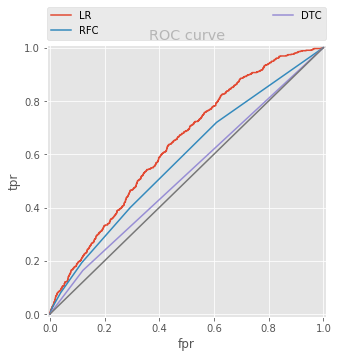

In [161]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, predict_proba_2[:,1])
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, predict_proba_3[:,1])
fpr_4, tpr_4, thresholds_4 = roc_curve(y_test, predict_proba_4[:,1])

plt.figure(figsize=(5, 5))
plt.plot(fpr_2, tpr_2, label='LR')
plt.plot(fpr_3, tpr_3, label="RFC")
plt.plot(fpr_4, tpr_4, label="DTC")
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

In [163]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

rfc = RandomForestClassifier()
cross_val_score(
    rfc,
    X_df_train_preproc,
    y_df_train_preproc,
    scoring='roc_auc',
    cv=10
)

array([0.59171976, 0.53407126, 0.59514422, 0.57504501, 0.60184327,
       0.6290906 , 0.59057519, 0.59298948, 0.6295026 , 0.58634193])

In [165]:

dtc = DecisionTreeClassifier()
cross_val_score(
    dtc,
    X_df_train_preproc,
    y_df_train_preproc,
    scoring='roc_auc',
    cv=10
)

array([0.53016246, 0.51563742, 0.5608394 , 0.51628413, 0.55300942,
       0.53426568, 0.52813106, 0.5474001 , 0.56853342, 0.54411238])

In [167]:
lr = LogisticRegression()
cross_val_score(
    lr,
    X_df_train_preproc,
    y_df_train_preproc,
    scoring='roc_auc',
    cv=10
)

array([0.66193642, 0.64157878, 0.64418818, 0.64384211, 0.64855534,
       0.58352594, 0.62880426, 0.65645741, 0.65681585, 0.63238451])

In [171]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

predict_better = LogisticRegression()
predict_better.fit(X_df_train_preproc, y_df_train_preproc)                       # обучаем модель            # делаем предсказание
predict_proba_better = predict_better.predict_proba(X_df_test_preproc)

predict_proba_better[:,1]

## Your Code Here

array([0.09847588, 0.03885902, 0.12973725, ..., 0.12419095, 0.07321013,
       0.16798302])

(-0.01, 1.01)

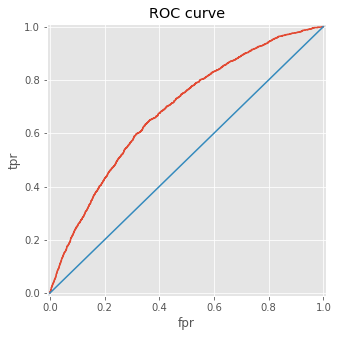

In [172]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here

fpr, tpr, thresholds = roc_curve(y_df_test_preproc, predict_proba_better[:,1])

plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='LR')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [173]:
### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [175]:
df_2 = df.copy()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

In [209]:
### Можно попробовать удалить часть данных, такие как адрес и пр. и протестировать модели еще раз.

def preproc_data(df):
    #list(df)
    df_output = df.copy()
    df_output = df_output.drop('AGREEMENT_RK', axis=1) #Удаляем идентификатор AGREEMENT_RK
    df_output = df_output.drop('JOB_DIR', axis=1)
    df_output = df_output.drop('REG_ADDRESS_PROVINCE', axis=1)
    df_output = df_output.drop('FACT_ADDRESS_PROVINCE', axis=1)
    df_output = df_output.drop('POSTAL_ADDRESS_PROVINCE', axis=1)
    df_output = df_output.drop('TP_PROVINCE', axis=1)
    df_output = df_output.drop('REGION_NM', axis=1)
    df_output = df_output.drop('GEN_INDUSTRY', axis=1)
    df_output = df_output.drop('GEN_TITLE', axis=1)
    df_output = df_output.drop('ORG_TP_STATE', axis=1)
    df_output = df_output.drop('ORG_TP_FCAPITAL', axis=1)
    for i in df_output.columns: #проходим по названию колонок
            if i == 'PERSONAL_INCOME' or i == 'CREDIT' or i == 'FST_PAYMENT' or i == 'LOAN_AVG_DLQ_AMT' or i == 'LOAN_MAX_DLQ_AMT': # Находим все столбцы
                df_output[i] = df_output[i].map(lambda x: x.replace(',', '.')).astype('float') #заменяем ',', на '.'

    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0) # Заменяем NaN числовым значением 0

    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS', 'FAMILY_INCOME'])
    #df_output['WORK_TIME'] = df_output['WORK_TIME'].fillna(df_output['WORK_TIME'].median)

    for j in df_output.columns:
        if j == 'WORK_TIME':
            df_output[j] = df_output[j].fillna(df_output[j].median())

    return df_output

In [210]:
df_2_preroc = preproc_data(df_2)

In [216]:
df_2_preroc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 56 columns):
TARGET                                      30133 non-null int64
AGE                                         30133 non-null int64
SOCSTATUS_WORK_FL                           30133 non-null int64
SOCSTATUS_PENS_FL                           30133 non-null int64
GENDER                                      30133 non-null int64
CHILD_TOTAL                                 30133 non-null int64
DEPENDANTS                                  30133 non-null int64
PERSONAL_INCOME                             30133 non-null float64
REG_FACT_FL                                 30133 non-null int64
FACT_POST_FL                                30133 non-null int64
REG_POST_FL                                 30133 non-null int64
REG_FACT_POST_FL                            30133 non-null int64
REG_FACT_POST_TP_FL                         30133 non-null int64
FL_PRESENCE_FL                              

In [213]:
df_preproc_last = df_2.pipe(preproc_data)

df_2_train_preproc = df_preproc_last.query('sample == "train"').drop(['sample'], axis=1)
df_2_test_preproc = df_preproc_last.query('sample == "test"').drop(['sample'], axis=1)

In [217]:
df_preproc_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 56 columns):
TARGET                                      30133 non-null int64
AGE                                         30133 non-null int64
SOCSTATUS_WORK_FL                           30133 non-null int64
SOCSTATUS_PENS_FL                           30133 non-null int64
GENDER                                      30133 non-null int64
CHILD_TOTAL                                 30133 non-null int64
DEPENDANTS                                  30133 non-null int64
PERSONAL_INCOME                             30133 non-null float64
REG_FACT_FL                                 30133 non-null int64
FACT_POST_FL                                30133 non-null int64
REG_POST_FL                                 30133 non-null int64
REG_FACT_POST_FL                            30133 non-null int64
REG_FACT_POST_TP_FL                         30133 non-null int64
FL_PRESENCE_FL                              

In [218]:
from sklearn.linear_model import LogisticRegression

X_df_2_train_preproc = df_2_train_preproc.drop('TARGET', axis=1)
X_df_2_test_preproc = df_2_test_preproc.drop('TARGET', axis=1)

y_df_2_train_preproc = df_2_train_preproc['TARGET']
y_df_2_test_preproc = df_2_test_preproc['TARGET']

model_df2 = LogisticRegression()                      # инициализируем модель
model_df2.fit(X_df_2_train_preproc, y_df_2_train_preproc) # обучаем модель
predict_df2 = model_df2.predict(X_df_2_test_preproc)        # делаем предсказание
predict_proba_df2 = model_df2.predict_proba(X_df_2_test_preproc)


In [219]:
print('precision', precision_score(y_df_2_test_preproc, predict_df2))
print('recall', recall_score(y_df_2_test_preproc, predict_df2))
print('accuracy', accuracy_score(y_df_2_test_preproc, predict_df2))
print('f1', f1_score(y_df_2_test_preproc, predict_df2))

precision 0.18181818181818182
recall 0.001142857142857143
accuracy 0.8821596244131455
f1 0.002271436683702442


In [220]:
predict_proba_df2[:,1]

array([0.14012582, 0.05667618, 0.1838326 , ..., 0.17243731, 0.06330106,
       0.18116517])